In [117]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme(style="whitegrid")
%matplotlib inline

In [124]:
reports_dir = "../reports"
# reports_dir = "../reports/arrayUnit"

# Ensure the directory exists
if not os.path.exists(reports_dir):
    print(f"Directory {reports_dir} does not exist.")
    exit(1)

reports = []

# Iterate through files in the directory
for filename in os.listdir(reports_dir):
    if filename.endswith(".csv"):  # Process only .txt files (adjust as needed)
        file_path = os.path.join(reports_dir, filename)
        print(f"Processing file: {filename}")
        
        # Extract fields separated by underscores
        fields = filename.split('_')
        print(f"Extracted fields: {fields}")

        b = fields[2][1:]
        c = fields[3][1:]
        mr = fields[4][2:]
        k = fields[5][1:]

        # Read space-delimited file and clean up
        with open(file_path, 'r') as f:
            lines = f.readlines()
        
        # Find the start of the utilization table
        start_index = None
        for i, line in enumerate(lines):
            # if line.strip().startswith("+---------------------+"):
            if "+--" in line.strip():
                start_index = i + 1
                break
        
        if start_index is None:
            print("Utilization table not found in the file.")
            continue
        
        # Extract the table data
        table_lines = lines[start_index:]
        table_data = []
        for line in table_lines:
            if line.strip().startswith("+"):
                continue  # Skip separator lines
            if line.strip() == "":
                break  # Stop at the end of the table
            if "Instance" in line.strip().split('|')[1]:
                continue
            table_data = line.strip().split("|")[1:-1]  # Split columns and remove borders
            break
        table_data = [item.strip() for item in table_data]

        table_data = [int(i) if i.strip().isdigit() else i for i in table_data]
        
        # Convert the table data to a DataFrame
        columns = ["Instance", "Module", "Total LUTs", "Logic LUTs", "LUTRAMs", "SRLs", "FFs", "RAMB36", "RAMB18", "DSP Blocks"]
        d = {key: value for key, value in zip(columns, table_data)}
        d["B"] = int(b)
        d["C"] = int(c)
        d["MR"] = int(mr)
        d["K"] = int(k)
        reports.append(d)

Processing file: u_arrayUnit_b3_c6_mr4_k5_.csv
Extracted fields: ['u', 'arrayUnit', 'b3', 'c6', 'mr4', 'k5', '.csv']
Processing file: u_arrayUnit_b3_c3_mr4_k5_.csv
Extracted fields: ['u', 'arrayUnit', 'b3', 'c3', 'mr4', 'k5', '.csv']
Processing file: u_arrayUnit_b3_c4_mr4_k5_.csv
Extracted fields: ['u', 'arrayUnit', 'b3', 'c4', 'mr4', 'k5', '.csv']
Processing file: u_arrayUnit_b3_c2_mr4_k5_.csv
Extracted fields: ['u', 'arrayUnit', 'b3', 'c2', 'mr4', 'k5', '.csv']
Processing file: u_arrayUnit_b3_c9_mr4_k5_.csv
Extracted fields: ['u', 'arrayUnit', 'b3', 'c9', 'mr4', 'k5', '.csv']
Processing file: u_arrayUnit_b3_c7_mr4_k5_.csv
Extracted fields: ['u', 'arrayUnit', 'b3', 'c7', 'mr4', 'k5', '.csv']
Processing file: u_arrayUnit_b3_c5_mr4_k5_.csv
Extracted fields: ['u', 'arrayUnit', 'b3', 'c5', 'mr4', 'k5', '.csv']
Processing file: u_arrayUnit_b3_c8_mr4_k5_.csv
Extracted fields: ['u', 'arrayUnit', 'b3', 'c8', 'mr4', 'k5', '.csv']


In [125]:
reports.sort(key=lambda x: x["C"])

In [96]:
def array_regs(b,c,K):
    # return b * K + c * (K**2 + 3*K -2) + K * K 
    # return b * K + c * (3*K -2) + K * K 
    # return b * K + c * (K + K + K - 1) + K * (K - 1)
    return K * (c + K + b) + (K - 1) * (c + 1) + K * c + c
    # return b * K + c * (K-2) + K * K + K 
    # return b * K + c * (K**2) + K * K 

Text(0.5, 1.0, 'FFs(K) at B=8 C=8 MR=8')

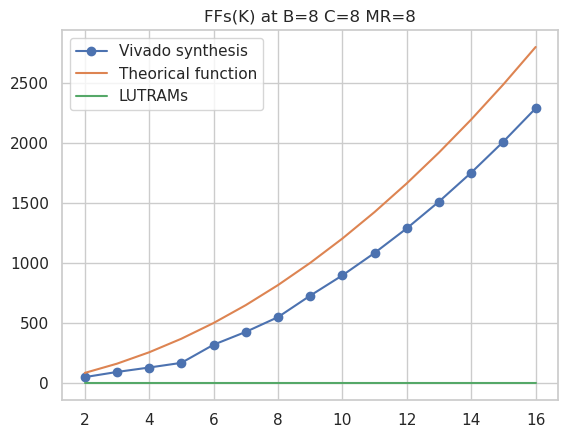

In [9]:
ks = []
ffs = []
lutrams = []
true_ffs = []
B = 8
C = 8
MR = 8
for report in filter(lambda x: x["B"] == B and x["C"] == C and x["MR"] == MR, reports):
    ks.append(report["K"])
    ffs.append(report["FFs"])
    lutrams.append(report["LUTRAMs"])
    true_ffs.append(array_regs(report["B"], report["C"], report["K"]))

plt.plot(ks, ffs, marker='o', label='Vivado synthesis')
plt.plot(ks, true_ffs, label='Theorical function')
plt.plot(ks, lutrams, label='LUTRAMs')
plt.legend()
plt.title(f'FFs(K) at B={B} C={C} MR={MR}')

    

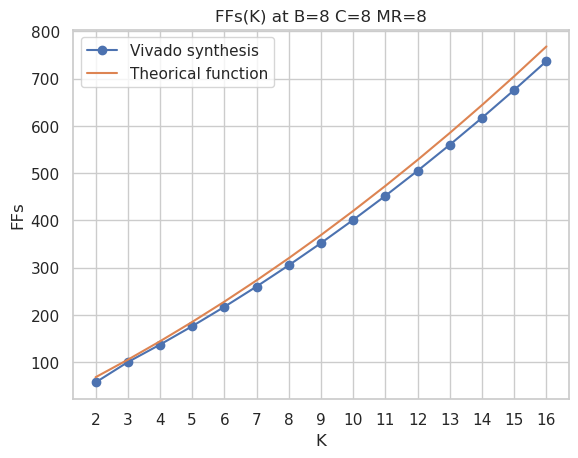

In [54]:
ks = []
ffs = []
lutrams = []
true_ffs = []
B = 8
C = 8
MR = 8
for report in filter(lambda x: x["B"] == B and x["C"] == C and x["MR"] == MR, reports):
    ks.append(report["K"])
    ffs.append(report["FFs"])
    lutrams.append(report["LUTRAMs"])
    true_ffs.append(array_regs(report["B"], report["C"], report["K"]))

plt.plot(ks, ffs, marker='o', label='Vivado synthesis')
plt.plot(ks, true_ffs, label='Theorical function')
plt.xlabel('K')
plt.ylabel('FFs')
plt.xticks(ks)
# plt.plot(ks, lutrams, label='LUTRAMs')
plt.legend()
plt.title(f'FFs(K) at B={B} C={C} MR={MR}')
plt.savefig(f"./figures/ff_b{B}_c{C}_mr{MR}.png", dpi=300, bbox_inches='tight')

    

In [44]:
reports[-1]

{'Instance': 'arrayUnit',
 'Module': 'ArrayUnit',
 'Total LUTs': 2655,
 'Logic LUTs': 2655,
 'LUTRAMs': 0,
 'SRLs': 0,
 'FFs': 737,
 'RAMB36': 0,
 'RAMB18': 0,
 'DSP Blocks': 0,
 'B': 8,
 'C': 8,
 'MR': 8,
 'K': 16}

In [58]:
def array_regs(b,c,K):
    return K * (2**b - 1) + c * (K + 1)

Text(0.5, 1.0, 'FFs(K) at B=3 C=4 MR=4')

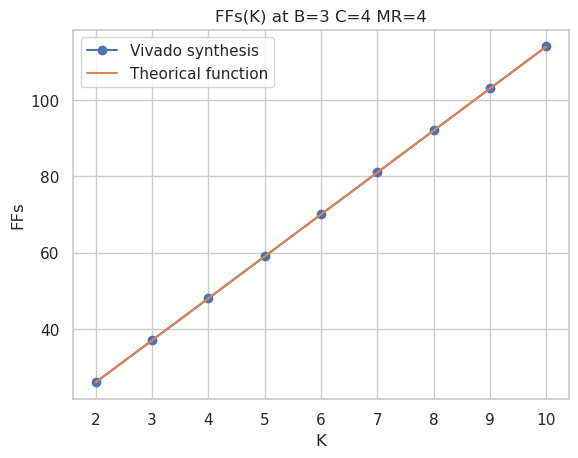

In [68]:
ks = []
ffs = []
lutrams = []
true_ffs = []
B = 3
C = 4
MR = 4
for report in filter(lambda x: x["B"] == B and x["C"] == C and x["MR"] == MR, reports):
    ks.append(report["K"])
    ffs.append(report["FFs"])
    lutrams.append(report["LUTRAMs"])
    true_ffs.append(array_regs(report["B"], report["C"], report["K"]))

plt.plot(ks, ffs, marker='o', label='Vivado synthesis')
plt.plot(ks, true_ffs, label='Theorical function')
plt.xlabel('K')
plt.ylabel('FFs')
plt.xticks(ks)
# plt.plot(ks, lutrams, label='LUTRAMs')
plt.legend()
plt.title(f'FFs(K) at B={B} C={C} MR={MR}')
# plt.savefig(f"./figures/ff_b{B}_c{C}_mr{MR}.png", dpi=300, bbox_inches='tight')

Text(0.5, 1.0, 'FFs(B) at C=4 MR=4 K=5')

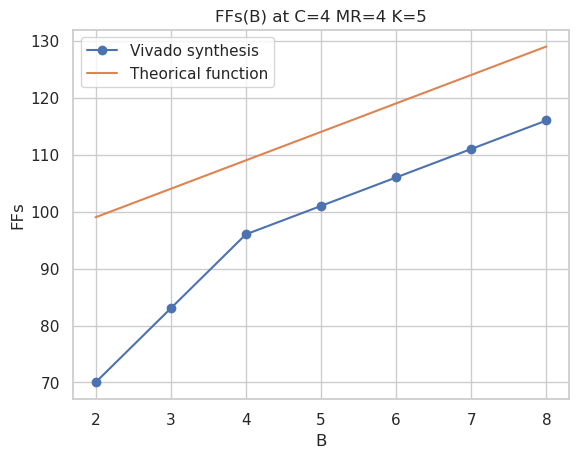

In [113]:

bs = []
ffs = []
lutrams = []
true_ffs = []
C = 4
MR = 4
K = 5
for report in filter(lambda x: x["K"] == 5 and x["C"] == C and x["MR"] == MR, reports):
    bs.append(report["B"])
    ffs.append(report["FFs"])
    lutrams.append(report["LUTRAMs"])
    true_ffs.append(array_regs(report["B"], report["C"], report["K"]))

plt.plot(bs, ffs, marker='o', label='Vivado synthesis')
plt.plot(bs, true_ffs, label='Theorical function')
plt.xlabel('B')
plt.ylabel('FFs')
plt.xticks(bs)
# plt.plot(ks, lutrams, label='LUTRAMs')
plt.legend()
plt.title(f'FFs(B) at C={C} MR={MR} K={K}')
# plt.savefig(f"./figures/ff_b{B}_c{C}_mr{MR}.png", dpi=300, bbox_inches='tight')

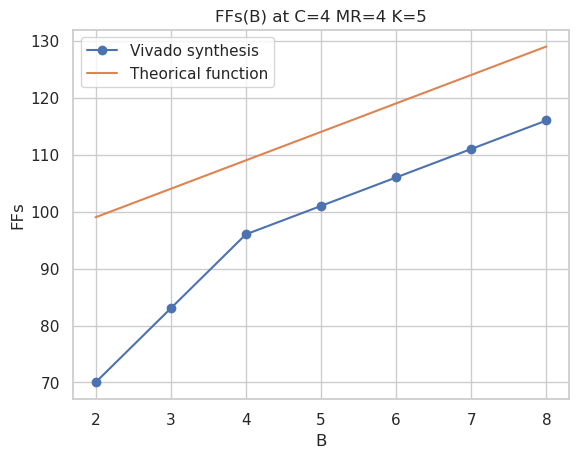

In [116]:
bs = []
ffs = []
lutrams = []
true_ffs = []
C = 4
MR = 4
K = 5
for report in filter(lambda x: x["K"] == 5 and x["C"] == C and x["MR"] == MR, reports):
    bs.append(report["B"])
    ffs.append(report["FFs"])
    lutrams.append(report["LUTRAMs"])
    true_ffs.append(array_regs(report["B"], report["C"], report["K"]))

plt.plot(bs, ffs, marker='o', label='Vivado synthesis')
plt.plot(bs, true_ffs, label='Theorical function')
plt.xlabel('B')
plt.ylabel('FFs')
plt.xticks(bs)
# plt.plot(ks, lutrams, label='LUTRAMs')
plt.legend()
plt.title(f'FFs(B) at C={C} MR={MR} K={K}')
plt.savefig(f"./figures/ff_b{B}_c{C}_mr{MR}.png", dpi=300, bbox_inches='tight')

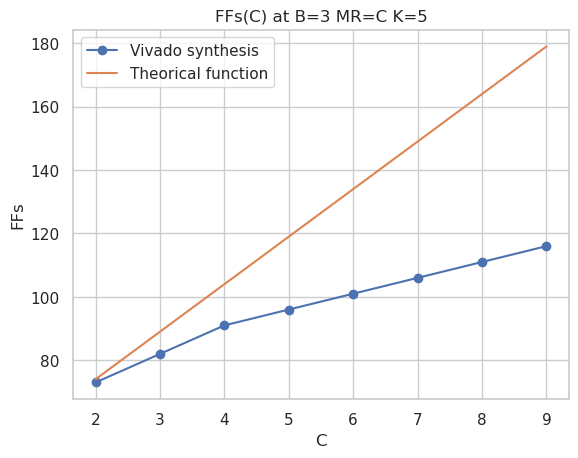

In [126]:
cs = []
ffs = []
lutrams = []
true_ffs = []
B = 3
K = 5
for report in filter(lambda x: x["K"] == K and x["B"] == B, reports):
    cs.append(report["C"])
    ffs.append(report["FFs"])
    lutrams.append(report["LUTRAMs"])
    true_ffs.append(array_regs(report["B"], report["C"], report["K"]))

plt.plot(cs, ffs, marker='o', label='Vivado synthesis')
plt.plot(cs, true_ffs, label='Theorical function')
plt.xlabel('C')
plt.ylabel('FFs')
plt.xticks(cs)
# plt.plot(ks, lutrams, label='LUTRAMs')
plt.legend()
plt.title(f'FFs(C) at B={B} MR=C K={K}')
plt.savefig(f"./figures/ff_b{B}_c{C}_mr{MR}.png", dpi=300, bbox_inches='tight')